In [2]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

In [2]:
# to detect faces you have to download the pretrained har cascad model from opencv git
# https://github.com/opencv/opencv/tree/master/data/haarcascades

### Object Detection using HAAR Cascad
- basically, object detection is an algorithm which detect, localize and classify the individual object in and image or video.
- Thar HaarCascad algorithm first perform the feaature detection in an image using different variety of filters/ kernals and sliding window, which ultimately detect the edged, line, many more feature, then by using these features a classifier detecte if there is face in the given image or not.

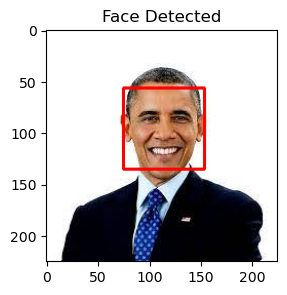

In [7]:
# to work with haarcascad we first have to load the model using cv2.CascadeClassifier(model_path)

model_path = "Haarcascades_Models/haarcascades/haarcascade_frontalface_default.xml"
img_path = 'images/obama_image_face_detection_2.jpeg'

model = cv2.CascadeClassifier(model_path)
img = cv2.imread(img_path)

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # it is not necessary to convert the image to grayscale

# use model.detectMultiScale(img, scale_factor, min_neighbours) to detect the faces in an image
# you have to set the scale_factor and, min_neighbours as per your convienence
face = model.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors= 5)

if face is None:
    print("No Face Detected")
else:
    for (x,y,w,h) in face:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    show_image(img, "Face Detected", 3)

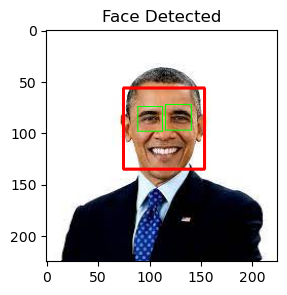

In [14]:
# now let's detect the eyes using haarcascades eye classifier
img_path = 'images/obama_image_face_detection_2.jpeg'
face_model_path = "Haarcascades_Models/haarcascades/haarcascade_frontalface_default.xml"
eyes_model_path = "Haarcascades_Models/haarcascades/haarcascade_eye.xml"

img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_model = cv2.CascadeClassifier(face_model_path)
eyes_model = cv2.CascadeClassifier(eyes_model_path)

faces = face_model.detectMultiScale(gray_img, 1.3, 3)

if faces is None:
    print("No face found")
else:
    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
        
        face_roi_gray = gray_img[y:y+h, x:x+w]
        face_roi_color = img[y:y+h, x:x+w]    
        
        eyes = eyes_model.detectMultiScale(face_roi_gray, 1.1, 2) # is no output try changing scale factor.
        
        if eyes is None:
            print("No eyes Detecte")
        else:
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(face_roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 1)
    show_image(img, "Face Detected", 3)

#### Face and eyes detection using realtime video feed

In [14]:
import cv2

face_model_path = "Haarcascades_Models/haarcascades/haarcascade_frontalface_default.xml"
eyes_model_path = "Haarcascades_Models/haarcascades/haarcascade_eye.xml"

face_model = cv2.CascadeClassifier(face_model_path)
eyes_model = cv2.CascadeClassifier(eyes_model_path)

def face_detector(img):
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = face_model.detectMultiScale(gray_img, scaleFactor= 1.3, minNeighbors= 3)
    
    if faces is None:
        print("No face Detected")
        return img
    else:
        for x,y,w,h in faces: # you can adjust the detected face rectangle coordinate so that it cover whole head
            
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 1) 
            
            roi_gray = gray_img[y:y+h , x: x+w]
            roi_img = img[y:y+h , x: x+w]
            
            eyes = eyes_model.detectMultiScale(roi_gray, scaleFactor= 1.2, minNeighbors= 3)
            
            if eyes is None:
                print("No Eyes Detected")
            else:
                for ex,ey,ew,eh in eyes:
                    cv2.rectangle(roi_img, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 1)
                    
        img = cv2.flip(img,1) # flipping image because webcam input in cv2 is mirrored
        return img

In [15]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Frame reading issue")
        break
    
    cv2.imshow("Camera Fees", face_detector(frame))    
    
    if cv2.waitKey(1) == ord('q'):
        break;
    
cap.release()
cv2.destroyAllWindows()